# 学习 networkx 的基本使用方法

[Introduction](https://networkx.github.io/documentation/latest/reference/introduction.html)

## NetworkX Basics

networkx 总共有4种不同类型的基本图形。

- Graph：无向图，忽略多条边相连的两个节点（即两个节点之间只能有一条边相连）
- DiGraph：有向图，忽略多边
- MultiGraph：无向多边图，两个节点之间可有多条边相连（想象一下两个城市之间有多条公路）
- MultiDiGraph：有向多边图，想象一下道路之间的单行道

In [1]:
import networkx as nx
import sys
import matplotlib.pyplot as plt
%matplotlib inline
# networks 的基本创建方式
G1 = nx.Graph()
G2 = nx.DiGraph()
G3 = nx.MultiGraph()
G4 = nx.MultiDiGraph()

## 1 基本的使用

In [2]:
G = nx.Graph()
elist = [(1, 2), (2, 3), (1, 4), (4, 2)]
G.add_edges_from(elist)
elist = [('a', 'b', 5.0), ('b', 'c', 3.0), ('a', 'c', 1.0), ('c', 'd', 7.3)]
G.add_weighted_edges_from(elist)

In [3]:
# 遍历图节点
for n in G.nodes:
    print n

a
1
2
3
4
d
c
b


In [4]:
# 遍历图的边
for e in list(G.edges):
    print e

('a', 'c')
('a', 'b')
(1, 2)
(1, 4)
(2, 3)
(2, 4)
('d', 'c')
('c', 'b')


In [5]:
for e, datadict in G.edges.items():
    print e, datadict

('a', 'c') {'weight': 1.0}
('a', 'b') {'weight': 5.0}
(1, 2) {}
(1, 4) {}
(2, 3) {}
(2, 4) {}
('d', 'c') {'weight': 7.3}
('c', 'b') {'weight': 3.0}


## 2 常用的绘图方法

[Examples](https://networkx.github.io/documentation/latest/auto_examples/index.html)

#C:\Users\i-chenxiaolong\AppData\Local\conda\conda\envs\py27\lib\site-packages\ipykernel_launcher.py -f C:\Users\i-chenxiaolong\AppData\Roaming\jupyter\runtime\kernel-deaf2e1c-edcc-4399-b865-977843ac284c.json
# GMT Fri Aug 10 01:22:23 2018
# 
(1, 3) (1, 2) (0, 3) (2, 3) (1, 4)
(3, 0) (2, 0) (3, 1) (4, 0)
(2, 1) (2, 0) (3, 1) (1, 1) (2, 2)
(0, 3) (0, 2) (0, 4)
(4, 0) (4, 1)
(1, 2) (1, 1) (0, 2) (2, 2)
(3, 3) (3, 4) (3, 2) (2, 3) (4, 3)
(4, 4) (3, 4) (4, 3)
(2, 2) (3, 2) (2, 3)
(4, 1) (4, 2) (3, 1)
(1, 1) (0, 1) (1, 0)
(3, 2) (4, 2) (3, 1)
(0, 0) (0, 1) (1, 0)
(0, 4) (1, 4)
(1, 4) (2, 4)
(2, 3) (2, 4)
(4, 2) (4, 3)
(1, 0) (2, 0)
(0, 1) (0, 2)
(3, 1)
(2, 4) (3, 4)
(2, 0)
(4, 3)
(3, 4)
(0, 2)


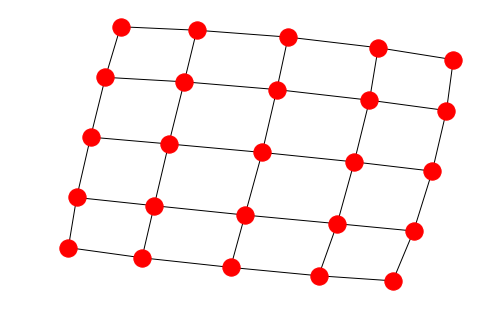

In [6]:
# Read and write graphs.
G = nx.grid_2d_graph(5, 5) 
try:  # Python 2.6+
    nx.write_adjlist(G, sys.stdout)  # write adjacency list to screen
except TypeError:  # Python 3.x
    nx.write_adjlist(G, sys.stdout.buffer)  # write adjacency list to screen
# write edgelist to grid.edgelist
nx.write_edgelist(G, path="grid.edgelist", delimiter=":")
# read edgelist from grid.edgelist
H = nx.read_edgelist(path="grid.edgelist", delimiter=":")

nx.draw(H)
plt.show()

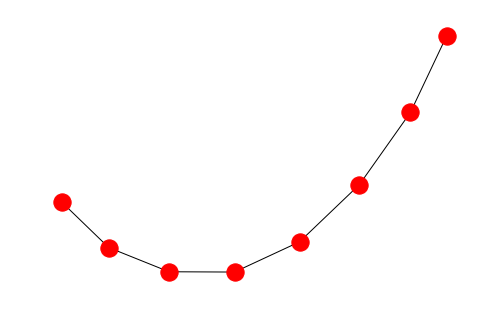

In [7]:
# Simple Path
G = nx.path_graph(8)
nx.draw(G)

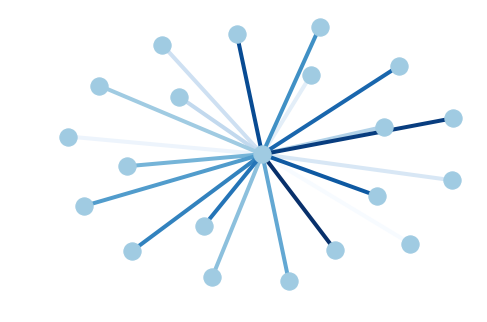

In [8]:
# Edge Colormap
G = nx.star_graph(20)
pos = nx.spring_layout(G)
colors = range(20)
nx.draw(G, pos, node_color='#A0CBE2', edge_color=colors,
        width=4, edge_cmap=plt.cm.Blues, with_labels=False)

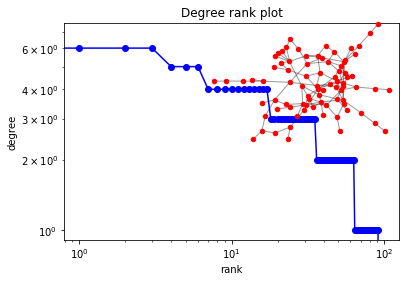

In [9]:
# Degree Rank
G = nx.gnp_random_graph(100, 0.02)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
# print "Degree sequence", degree_sequence
dmax = max(degree_sequence)

plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

## 3 Algorithms

里面有大量的算法实现，在我们自己写函数前，可以先查询下有没有对应的实现函数，免得重复造轮子。

### 3.1 Traversal

- Depth First Search
- Breadth First Search
- Beam search

In [10]:
# Depth First Search on Edges
nodes = [0, 1, 2, 3]
edges = [(0, 1), (1, 0), (1, 0), (2, 1), (3, 1)]
print list(nx.edge_dfs(nx.Graph(edges), nodes))
print list(nx.edge_dfs(nx.DiGraph(edges), nodes))
print list(nx.edge_dfs(nx.MultiGraph(edges), nodes))
print list(nx.edge_dfs(nx.MultiDiGraph(edges), nodes))
print list(nx.edge_dfs(nx.DiGraph(edges), nodes, orientation='ignore'))

[(0, 1), (1, 2), (1, 3)]
[(0, 1), (1, 0), (2, 1), (3, 1)]
[(0, 1, 0), (1, 0, 1), (0, 1, 2), (1, 2, 0), (1, 3, 0)]
[(0, 1, 0), (1, 0, 0), (1, 0, 1), (2, 1, 0), (3, 1, 0)]
[(0, 1, 'forward'), (1, 0, 'forward'), (2, 1, 'reverse'), (3, 1, 'reverse')]


In [16]:
# Beam search
G = nx.karate_club_graph()
centrality = nx.eigenvector_centrality(G)
source = 0
width = 3
for u, v in nx.bfs_beam_edges(G, source, centrality.get, width):
    print((u, v))  

(0, 2)
(0, 1)
(0, 8)
(2, 32)
(1, 13)
(8, 33)


### 3.2 Bipartite

In [17]:
from networkx.algorithms import bipartite
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(['a', 'b', 'c'], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, 'a'), (1, 'b'), (2, 'b'), (2, 'c'), (3, 'c'), (4, 'a')])

In [19]:
nx.is_connected(B)

True

In [20]:
bottom_nodes, top_nodes = bipartite.sets(B)

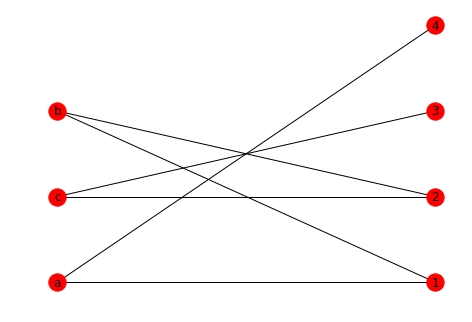

In [21]:
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(bottom_nodes) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(top_nodes) ) # put nodes from Y at x=2
nx.draw(B, with_labels=True,pos=pos)

[2, 2, 2, 2, 2, 1, 1]


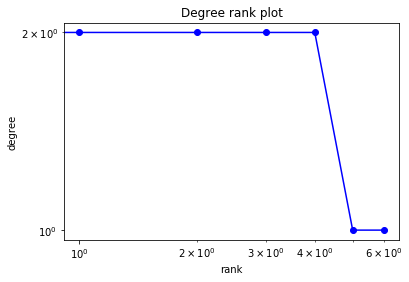

In [27]:
degree_sequence = sorted([d for n, d in B.degree()], reverse=True)
# print "Degree sequence", degree_sequence
dmax = max(degree_sequence)

plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

print degree_sequence